In [2]:
query=""" select * from Doctor """
df1=pd.read_sql(query,engine)
df1.head()

,doctor_id,first_name,last_namle,specialization,phone_number,year_experience,hospital_branch,email
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com
1,D002,Jane,Davis,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com
2,D003,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com
3,D004,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
4,D005,Sarah,Taylor,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

##### 1.How many total appointments were made per doctor?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4704\3788345147.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_doctor,x='doctor_name' ,y='total_appointment', palette='viridis')


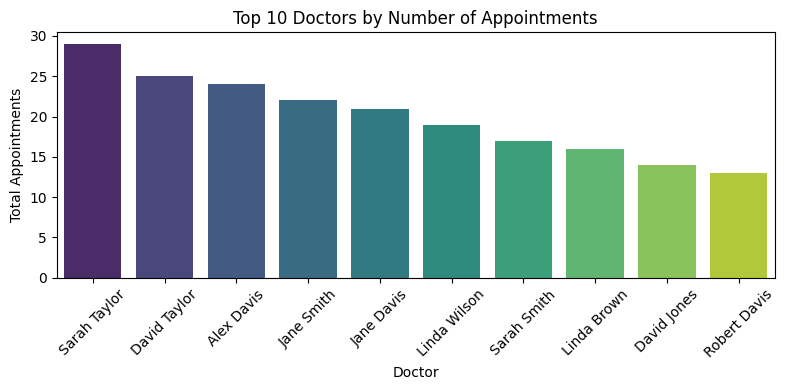

In [4]:
query1= """
       select d.first_name ||' ' || d.last_namle as doctor_name, 
count(a.appointment_id) as total_appointment from doctor as d 
left join appointment as a  on d.doctor_id=a.doctor_id 
group by doctor_name 
order by total_appointment desc;
"""
df_doctor=pd.read_sql(query1,engine)

plt.figure(figsize=(8,4))
sns.barplot(data=df_doctor,x='doctor_name' ,y='total_appointment', palette='viridis')
plt.title('Top 10 Doctors by Number of Appointments')
plt.xlabel('Doctor')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 2.Which patients have the highest number of appointments?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4704\1678555168.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_patient ,x='patient_name', y='total_appointments',palette='viridis')


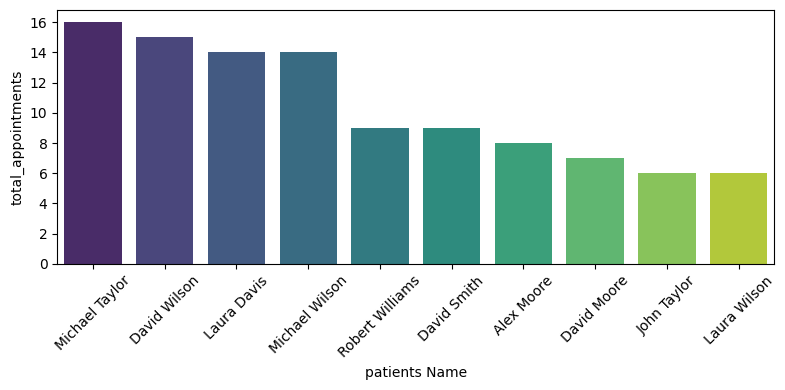

In [5]:
query2= """
      select p.first_name ||' '|| p.last_name as patient_name,
count(a.appointment_id) as total_appointments from patient as p 
left join appointment as a on p.patient_id=a.patient_id
group by patient_name
order by total_appointments desc limit 10;
"""
df_patient=pd.read_sql(query2,engine)

plt.figure(figsize=(8,4))
sns.barplot(data=df_patient ,x='patient_name', y='total_appointments',palette='viridis')
plt.xlabel("patients Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 3.What is the trend of appointments over the last 12 months?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4704\1711229506.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_month , x='month_name',y='total_appointments' ,palette='viridis')


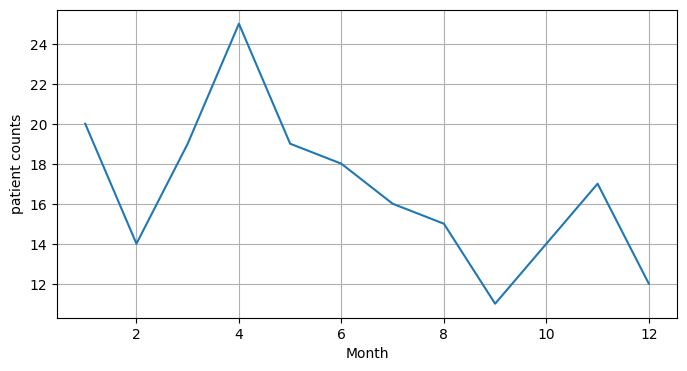

In [8]:
query3="""
      SELECT  extract(month from appointment_date) AS month_name,
           COUNT(*) AS total_appointments
FROM appointment group by month_name order by month_name;
"""
df_month=pd.read_sql(query3 , engine)

plt.figure(figsize=(8,4))
sns.lineplot(data=df_month , x='month_name',y='total_appointments' ,palette='viridis')
plt.xlabel('Month')
plt.ylabel("patient counts")
plt.grid(True)
plt.show()

##### 4.How many appointments were completed, canceled, or pending?

Text(0, 0.5, 'Count')

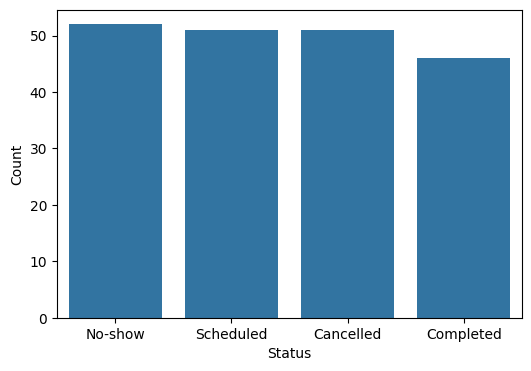

In [24]:
query4="""
         select status,count(a.appointment_id) as appointment from appointment as a 
group by status order by appointment desc;
"""

df_status=pd.read_sql(query4,engine)
plt.figure(figsize=(6,4))
sns.barplot(data=df_status, x='status', y='appointment')
plt.xlabel("Status")
plt.ylabel("Count")
#plt.show()

##### 5.What is the total billing amount generated per month?

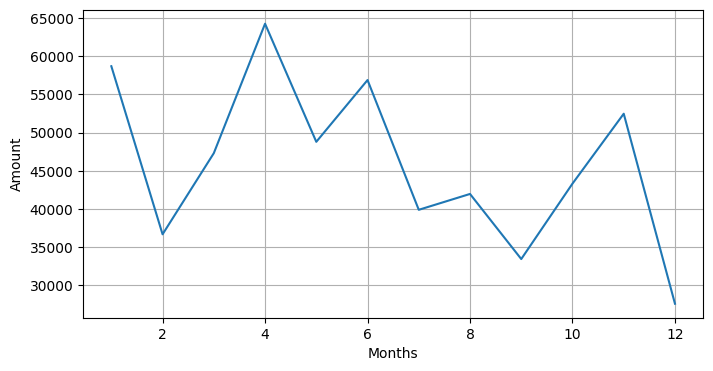

In [34]:
query5="""
 select extract(month from b.bill_date)as Month ,sum(b.amount) as Total_Amount 
from billing as b group by Month order by Month ;      
"""
df_month=pd.read_sql(query5,engine)

plt.figure(figsize=(8,4))
sns.lineplot(data= df_month, x='month', y='total_amount')
plt.xlabel("Months")
plt.ylabel("Amount")
plt.grid()
plt.show()


##### 6.Which doctor generates the most revenue?

In [35]:
query6="""
    select d.first_name ||' '|| d.last_namle as doctor_name ,
sum(b.amount) as revenue from doctor as d
join appointment as a on d.doctor_id=a.doctor_id
join billing as b on a.patient_id=b.patient_id 
group by doctor_name order by revenue desc;  
"""
df_doctor=pd.read_sql(query6,engine)
df_doctor


,doctor_name,revenue
0,Sarah Taylor,394356.89
1,Alex Davis,339280.84
2,David Taylor,336851.92
3,Linda Wilson,304846.08
4,Jane Smith,279957.14
5,Jane Davis,264650.98
6,Linda Brown,234358.03
7,Sarah Smith,214192.66
8,David Jones,191212.99
9,Robert Davis,188582.63


##### 7.What is the average billing amount per treatment type?

In [46]:
query7="""
select  t.tretment_type as treatmenttype ,avg(b.amount) as average_amount 
from treatment as t
left join billing as b on t.treatment_id=b.treatment_id 
group by treatmenttype order by average_amount desc;
"""
treatment=pd.read_sql(query7,engine)
treatment

,treatmenttype,average_amount
0,MRI,3224.948889
1,Physiotherapy,2761.613889
2,X-Ray,2698.870000
3,Chemotherapy,2629.707755
4,ECG,2532.216842


In [ ]:
##### 8.What percentage of billing is overdue or unpaid?

Text(0.5, 1.0, 'payment status')

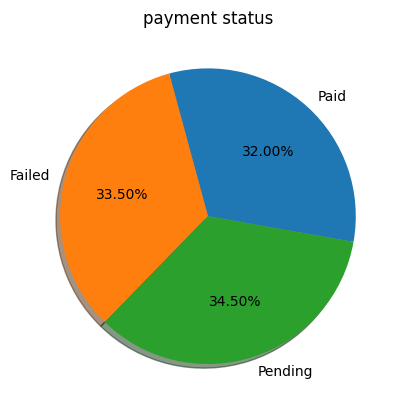

In [56]:
query8="""
select payment_status,count(*)*100.0/(select count(*) from billing) as percentage
   from billing group by Payment_status;
"""
payment=pd.read_sql(query8,engine)

x=payment['percentage']
y=payment['payment_status']

plt.pie(x,labels=y,autopct="%0.2f%%",startangle=-10,shadow=True)
plt.title("payment status")

##### 9.How many patients received each type of treatment?

In [57]:
query9="""
select tretment_type,count(appointment_id) as total
from treatment group by tretment_type order by total desc;
"""
treatment=pd.read_sql(query9,engine)
treatment

,tretment_type,total
0,Chemotherapy,49
1,X-Ray,41
2,ECG,38
3,MRI,36
4,Physiotherapy,36


##### 10.What is the average cost associated with each treatment?

In [61]:
query10="""
       select tretment_type, avg(cost) as average_cost from treatment 
group by tretment_type order by average_cost desc;
"""
treatment=pd.read_sql(query10,engine)
treatment

,tretment_type,average_cost
0,MRI,3224.948889
1,Physiotherapy,2761.613889
2,X-Ray,2698.870000
3,Chemotherapy,2629.707755
4,ECG,2532.216842


##### 11 what is the revenue by each treatment?

In [62]:
query11="""
          select tretment_type, sum(cost) as revenue from treatment group by tretment_type 
order by revenue desc;
"""
treatment=pd.read_sql(query11,engine)
treatment

,tretment_type,revenue
0,Chemotherapy,128855.68
1,MRI,116098.16
2,X-Ray,110653.67
3,Physiotherapy,99418.10
4,ECG,96224.24


##### 12.Which doctors have the highest number of appointments?

In [64]:
query12="""
        select d.first_name ||' '||d.last_namle  as Name ,count(a.appointment_id) as total from doctor as d
left join appointment as a on d.doctor_id=a.doctor_id 
group by Name order by total desc;
"""

name=pd.read_sql(query12,engine)
name

,name,total
0,Sarah Taylor,29
1,David Taylor,25
2,Alex Davis,24
3,Jane Smith,22
4,Jane Davis,21
5,Linda Wilson,19
6,Sarah Smith,17
7,Linda Brown,16
8,David Jones,14
9,Robert Davis,13


##### 13.What is the average appointment time per doctor? (if you have time data)

In [65]:
query13="""
       select d.first_name ||' '|| d.last_namle as name , avg(a.appointment_time) as average_time
from doctor as d 
left join appointment as a on d.doctor_id=a.doctor_id
group by name order by average_time desc;
"""
name=pd.read_sql(query13,engine)
name

,name,average_time
0,Jane Smith,0 days 14:05:27.272727
1,Linda Wilson,0 days 13:30:00
2,Sarah Smith,0 days 13:13:14.117647
3,Linda Brown,0 days 12:58:07.500000
4,Jane Davis,0 days 12:44:17.142857
5,David Jones,0 days 12:43:55.714286
6,Alex Davis,0 days 12:40:37.500000
7,Robert Davis,0 days 12:36:55.384615
8,David Taylor,0 days 12:31:48
9,Sarah Taylor,0 days 12:30:00


##### 14.How does the revenue generated by each doctor compare?

In [66]:
query14="""
          select d.first_name ||' '|| d.last_namle as name ,sum(b.amount) as total_revenue from doctor as d
join appointment as a on d.doctor_id=a.doctor_id 
join billing as b on a.patient_id=b.patient_id
group by name order by total_revenue desc;
"""
name=pd.read_sql(query14,engine)
name

,name,total_revenue
0,Sarah Taylor,394356.89
1,Alex Davis,339280.84
2,David Taylor,336851.92
3,Linda Wilson,304846.08
4,Jane Smith,279957.14
5,Jane Davis,264650.98
6,Linda Brown,234358.03
7,Sarah Smith,214192.66
8,David Jones,191212.99
9,Robert Davis,188582.63


##### 15.How often do patients revisit the hospital ?

In [68]:
query15="""
        select distinct(p.patient_id) as patientID ,
p.first_name ||' '|| p.last_name as name ,
count(a.appointment_id) as visit_total from patient as p
join appointment as a on p.patient_id=a.patient_id
group by patientID , name order by visit_total desc;
"""
name=pd.read_sql(query15,engine)
name.head(10)

,patientid,name,visit_total
0,P012,Laura Davis,10
1,P005,David Wilson,8
2,P016,Michael Taylor,7
3,P029,David Smith,7
4,P035,David Wilson,7
5,P036,Michael Wilson,7
6,P049,David Moore,7
7,P010,Michael Taylor,6
8,P023,Linda Johnson,6
9,P026,John Taylor,6


##### 16.What percentage of patients have multiple treatments?

In [69]:
query16="""
WITH treatment_counts AS (
    SELECT
        a.patient_id,
        COUNT(t.treatment_id) AS treatment_count
    FROM treatment t
    JOIN appointment a ON t.appointment_id = a.appointment_id
    GROUP BY a.patient_id
)
SELECT
    CASE WHEN treatment_count > 1 THEN 'Multiple Treatments' ELSE 'Single Treatment' END AS treatment_group,
    COUNT(*) * 100.0 / (SELECT COUNT(DISTINCT patient_id) FROM appointment) AS percentage
FROM treatment_counts
GROUP BY treatment_group;
"""

treatment=pd.read_sql(query16,engine)
treatment

,treatment_group,percentage
0,Multiple Treatments,100.0


##### 17.Are there seasonal patterns in patient visits or treatments?

In [72]:
query17="""
with seasonal as( select extract(month from treatment_date)as month ,
count(*) as total_appointment from treatment group by month order by month)
select 
      case
	  when month>=1 and month<=3 then 'quarter_1'
	  when month>=3 and month<=6 then 'quarter_2'
	  when month>=6 and month<=9 then 'quarter_3'
	  when month>=9 and month <=12 then 'quarter_4'
	  else 'invalid' end as quarters,
	  sum(total_appointment) as total_appointment from  seasonal 
	  group by quarters order by quarters ;
"""
month=pd.read_sql(query17,engine)
month

,quarters,total_appointment
0,quarter_1,53.0
1,quarter_2,62.0
2,quarter_3,42.0
3,quarter_4,43.0


In [73]:
query18="""
select extract(month from treatment_date)as month ,count(*) as total_appointment
from treatment group by month order by month ;
"""
month2=pd.read_sql(query18,engine)
month2

,month,total_appointment
0,1.0,20
1,2.0,14
2,3.0,19
3,4.0,25
4,5.0,19
5,6.0,18
6,7.0,16
7,8.0,15
8,9.0,11
9,10.0,14
